# Project in the course Fundamentals of data representation and analysis   
# Projekt zaliczeniowy z przedmiotu Podstawy reprezentacji i analizy danych 

[ANG] Topic: **Recognition of finger counting gestures**.

[POL] Temat: **Rozpoznawanie gestów liczenia na palcach**

Authors:
*   Wojciech Pacześniak
*   Sebastian Pietrykowski



[ANG]

## 1. Project assumptions

The aim of the project is to build an artificial intelligence model capable of indicating the number of fingers and distinguishing between the left and right hand in a selected image.

----

[POL]

## 1. Założenia projektu
Celem projektu jest zbudowanie modelu sztucznej inteligencji potrafiącego wskazać liczbę palców oraz rozróżnić lewą i prawą dłoń na wybranym zdjęciu.

[ANG]

## 2.Analysis of the dataset

The dataset consists of 21,600 images of hands.

Requirements for the processed images:

   * size 128 x 128 px
   * the photo is black and white
   * the hand shall be light in colour, the background dark
   * centred with respect to the centre of mass
   * noise is visible in the background.

The set is divided into 18,000 images in the teaching set and 3,600 images in the testing set, which is 83.33% and 16.66% respectively.

There are 12 classes in the collection:
1.    0R - 0 fingers, right hand
2.    1R - 1 finger, right hand
3.    2R - 2 fingers, right hand
4.    3R - 3 fingers, right hand
5.    4R - 4 fingers, right hand
6.    5R - 5 fingers, right hand
7.    0L - 0 fingers, left hand
8.    1L - 1 finger, left hand
9.    2L - 2 fingers, left hand
10.   3L - 3 fingers, left hand
11.   4L - 4 fingers, left hand
12.   5L - 5 fingers, left hand.

Class membership is specified in the last two characters of the file name. L/R indicates left or right hand, 0-5 indicates the number of fingers.

----

[POL]

## 2. Analiza zbioru danych
Zbiór danych składa się z 21 600 zdjęć dłoni.

Wymagania dotyczące przetwarzanych zdjęć:
*   rozmiar 128 x 128 px
*   zdjęcie jest czarno-białe
*   dłoń ma jasny kolor, tło - ciemny
*   wyśrodkowane względem środka masy
*   w tle widoczny jest szum.

Zbiór jest podzielony na 18 000 zdjęć w zbiorze uczącym i 3 600 zdjęć w zbiorze testującym, co wynosi odpowiednio 83,33% oraz 16,66%.

W zbiorze wyróżniamy 12 klas:
1.   0R - 0 palców, prawa ręka
2.   1R - 1 palce, prawa ręka
3.   2R - 2 palce, prawa ręka
4.   3R - 3 palce, prawa ręka
5.   4R - 4 palce, prawa ręka
6.   5R - 5 palców, prawa ręka
7.   0L - 0 palców, lewa ręka
8.   1L - 1 palce, lewa ręka
9.   2L - 2 palce, lewa ręka
10.  3L - 3 palce, lewa ręka
11.  4L - 4 palce, lewa ręka
12.  5L - 5 palców, lewa ręka.

Przynależność do klasy jest określona w dwóch ostatnich znakach nazwy pliku. L/R oznacza lewą lub prawą dłoń, cyfra 0-5 oznacza liczbę palców.


In [3]:
# loading libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# paths to the directories of the learning and testing collections
train_dir_path = "archive/fingers/train/"
test_dir_path = "archive/fingers/test/"

# function loading file paths in a given directory and extracting class labels from the file name
def load_paths_and_labels(root_dir):
  paths = []
  labels = []
  for file_name in os.listdir(root_dir):
    file = root_dir + file_name
    paths.append(file)
    label = file_name.split('.')[0][-2:]
    labels.append(label)
  return paths, labels

# function loading images that are in the given path list, the images are converted to black and white
def load_images(paths):
  images = []
  for path in paths:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image)
  return images

# loading paths to images, extracting labels
train_paths, train_labels = load_paths_and_labels(train_dir_path)
test_paths, test_labels = load_paths_and_labels(test_dir_path)


# load images from specified paths
train_images = load_images(train_paths)
test_images = load_images(test_paths)

In [5]:
# Checking for correct loading of the learning and testing sets
if len(train_images) != len(train_labels):
  raise Exception("Number of images and labels in the learning set varies")
if len(test_images) != len(test_labels):
  raise Exception("Number of photos and labels of the testing set is different.")

Length of the entire collection: 21600
Length of the learning set: 18000  - 83.33333333333334 % of the total
Długość zbioru testującego: 3600  - 16.666666666666664 % of the total
Whole set:
Number of classes occurring: 12
Occurrence of individual classes:


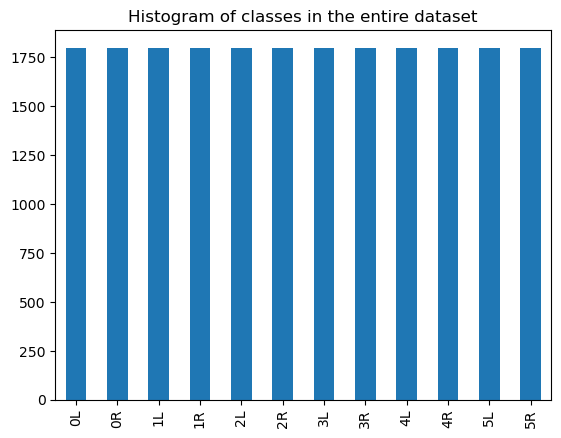


Learning set:
Number of classes present: 12
Occurrence of individual classes:


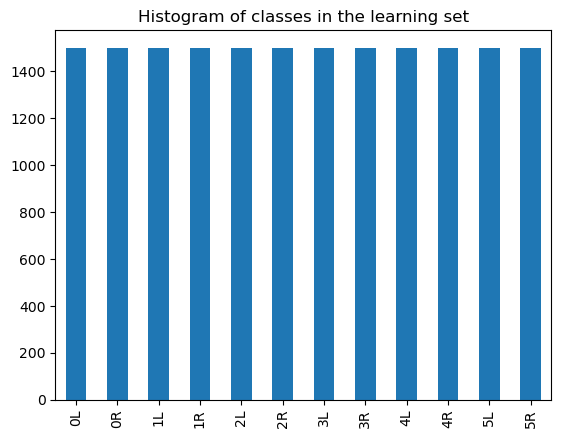


Testing set:
Number of classes occurring: 12
Occurrence of individual classes:


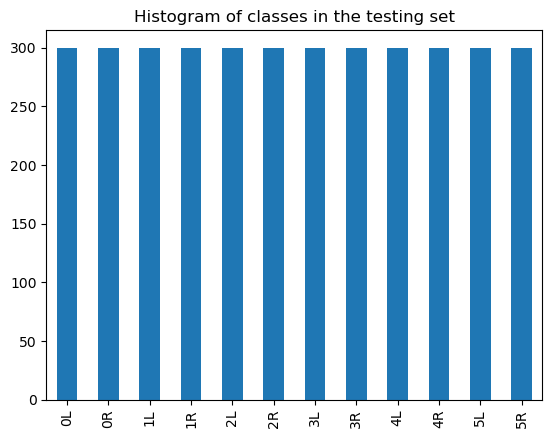

In [7]:
# Output the length of the sets
joined_set_length = len(train_labels) + len(test_labels)
print("Length of the entire collection:", joined_set_length)
print("Length of the learning set:", len(train_labels),
      " - " + str(len(train_labels) / joined_set_length * 100) + " % of the total")
print("Długość zbioru testującego:", len(test_labels), 
      " - " + str(len(test_labels) / joined_set_length * 100) + " % of the total")

# List the contents of the collections
print("Whole set:")
joined_labels = []
joined_labels.extend(train_labels)
joined_labels.extend(test_labels)
joined_labels = np.array(joined_labels)
print("Number of classes occurring:", len(np.unique(joined_labels)))
print("Occurrence of individual classes:")
joined_labels_value_counts = pd.value_counts(joined_labels).sort_index()
joined_labels_value_counts.plot(kind='bar', title="Histogram of classes in the entire dataset")
plt.show()
print()

print("Learning set:")
train_labels_array = np.array(train_labels)
print("Number of classes present:", len(np.unique(train_labels_array)))
print("Occurrence of individual classes:")
train_labels_value_counts = pd.value_counts(train_labels_array).sort_index()
train_labels_value_counts.plot(kind='bar', title="Histogram of classes in the learning set")
plt.show()
print()

print("Testing set:")
test_labels_array = np.array(test_labels)
print("Number of classes occurring:", len(np.unique(test_labels_array)))
print("Occurrence of individual classes:")
test_labals_value_counts = pd.value_counts(test_labels_array).sort_index()
test_labals_value_counts.plot(kind='bar', title="Histogram of classes in the testing set")
plt.show()

[ANG]

The histogram of the classes in the entire set is evenly distributed. This means that the data for learning has been chosen correctly - no class is favoured. All classes considered are present.

The histograms of the classes in the teaching and testing set are also evenly distributed. This indicates that the dataset has been divided correctly.

---

[POL]

Histogram klas w całym zbiorze jest równomiernie rozłożony. Oznacza to, że dane do uczenia zostały wybrane prawidłowo - nie jest faworyzowana żadna klasa. Obecne są wszystkie rozpatrywane klasy.

Histogramy klas w zbiorze uczącym i testującym również są równomierne. Wskazuje to na prawidłowe podzielenie zbioru danych.

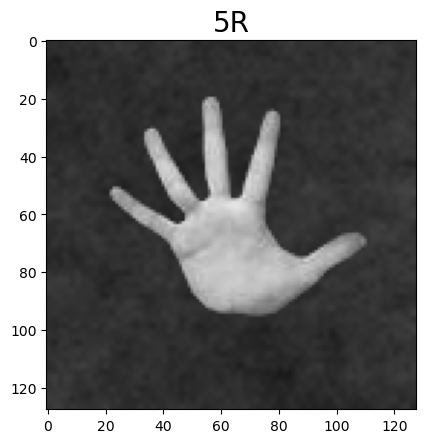

In [8]:
#Check that the name has been appropriately assigned   

index=5
image = cv2.imread(train_paths[index]) 

plt.imshow(image)
plt.title(train_labels[index], fontsize = 20)
plt.show()

[ANG]

## 3. How the problem was solved

Deep machine learning was used to solve the problem, using a special variety of neural network - a convolutional neural network (CNN), which was specifically designed for image data processing.

To create and train the neural network model, we used the Keras library. This is a library used for machine learning. Its main advantage is its intuitive and user-friendly interface. Keras provides a number of ready-made neural network layers, such as convolutional layers. In addition, by using libraries such as TensorFlow, high performance is maintained during numerical calculations.

The model created uses convolutional layers to distinguish between image features. These features are then compressed by pooling layers.

---

[POL]

## 3. Sposób rozwiązania problemu
Do rozwiązania problemu zostało użyte głębokie uczenie maszynowe, wykorzystujące specjalną odmianę sieci neuronowej - konwulsyjną sieć neuronową (CNN), która została zaprojektowana specjalnie do przetwarzania danych obrazów.


W celu stworzenia i wytrenowania modelu sieci neuronowej użyliśmy biblioteki Keras. Jest to biblioteka wykorzystywana do uczenia maszynowego. Jej główną zaletą jest intuicyjny i przyjazny dla użytkownika interfejs. Keras udostępnia szereg gotowych warstw sieci neuronowej, takich jak np. warstwy konwulsyjne. Ponadto dzięki wykorzystaniu takich bibliotek jak TensorFlow zostaje zachowana wysoka wydajność podczas obliczeń numerycznych.

Stworzony model wykorzystuje konwulsyjne warstwy do rozróżniania cech obrazu. Następnie cechy te są kompresowane przez warstwy zbierające (ang. pooling layers).

[ANG]

## 4. General description of the programme operation

1.    We load the dataset: the images and their labels, and convert the images to black and white.
2.    We convert the labels to binary vectors (one-hot encoding).
3.    We build a convolutional neural network model.
4.    We match the shape of the photos to the model input.
5.    We train the model with data.

---

[POL]

## 4. Ogólny opis działania programu

1.   Wczytujemy zbiór danych: zdjęcia i ich etykiety, przekształcamy zdjęcia na czarno-białe.
2.   Przekształcamy etykiety do wektorów binarnych (one-hot encoding).
3.   Budujemy model konwulsyjnej sieci neuronowej.
4.   Dopasowujemy kształt zdjęć do wejścia modelu.
5.   Trenujemy model danymi.

## [ANG] 5. Building the model 
## [POL] 5.Budowa modelu

In [9]:
# dictionary for transforming labels into integers
label_to_int = {
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}

num_classes = len(label_to_int)

# function that transforms labels according to the given dictionary
def transform_labels_to_ints(labels):
  ints = []
  for label in labels:
    ints.append(label_to_int[label])
  return ints

# transforming word labels into integers
train_labels = transform_labels_to_ints(train_labels)
test_labels = transform_labels_to_ints(test_labels)


[ANG]

We transform categories in the form of words to integers. We will need this to convert the categorical data into its binary representation using the one-hot encoding method.

---

[POL]

Kategorie w formie napisów przekształcamy do liczb całkowitych. Będzie nam to potrzebne do konwersji danych kategorycznych na ich binarną reprezentację metodą "one-hot encoding".

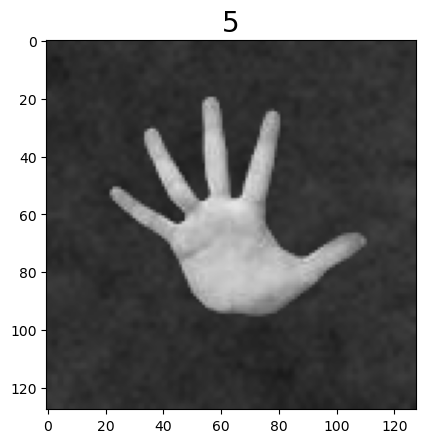

In [10]:

#Checking that the labelling works properly

index=5
image = cv2.imread(train_paths[index]) 


plt.imshow(image)
plt.title(train_labels[index], fontsize = 20)
plt.show()

In [11]:
#Transforming lists into arrays from the Numpy package
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

[ANG]

We convert lists containing labels and images to arrays from the Numpy package to increase computational efficiency.

---

[POL]

Listy zawierające etykiety i zdjęcia przekształcamy do tablic z pakietu Numpy w celu zwiększenia wydajności obliczeń.

In [12]:
print("Dimension train_labels before conversion:", train_labels.shape)
print("Dimension test_labels before conversion:", test_labels.shape)
print("Example row before conversion:", train_labels[0], "\n")

# one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

print("Dimension of train_labels after conversion:", train_labels.shape)
print("Dimension of test_labels after conversion:", test_labels.shape)
print("Example row after conversion:", train_labels[0])

Dimension train_labels before conversion: (18000,)
Dimension test_labels before conversion: (3600,)
Example row before conversion: 6 

Dimension of train_labels after conversion: (18000, 12)
Dimension of test_labels after conversion: (3600, 12)
Example row after conversion: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


[ANG]

Using the "to_categorical" function from the Keras package, we convert a vector of scalar values (integers) into a binary representation of vectors, so-called one-hot encoding. For each integer, the result of the transformation is a vector of length which is the number of classes. Thus, transforming an array of length a will result in an array of size a x the number of classes. Each row is another label and each column represents another class. In each row, a value of 1 means that the label belongs to the class, and a value of 0 means that it does not.

---

[POL]

Używając funkcji "to_categorical" z pakietu Keras dokonujemy konwersji wektora wartości skalarnych (liczb całkowitych) na binarną reprezentację wektorów, tzw. one-hot encoding. Dla każdej liczby całkowitej wynikiem przekształcenia jest wektor o długości będącej liczbą klas. Tak więc, przekształcając tablicę o długości *a* otrzymamy macierz o wymiarach *a x liczba klas*. Każdy wiersz to kolejna etykieta, a każda kolumna reprezentuje kolejną klasę. W każdym wierszu wartość 1 oznacza, że dana etykieta należy do danej klasy, a wartość 0, że nie należy.

C:\Users\Wojciech\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


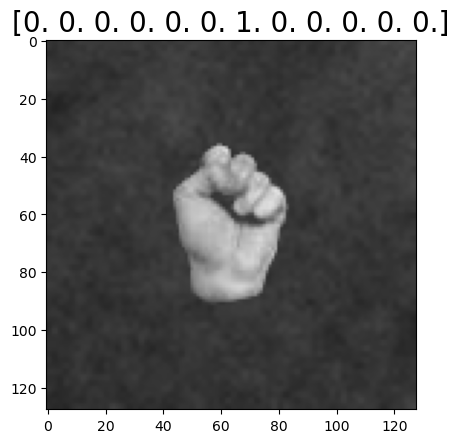

In [13]:
# checking if the conversion was successful
index=0
image = cv2.imread(train_paths[index]) 


plt.imshow(image)
plt.title(train_labels[index], fontsize = 20)
plt.show()

In [14]:
# Checking the dimensions of the images
print(train_images.shape)
print(test_images.shape)

(18000, 128, 128)
(3600, 128, 128)


[ANG]

We check that the images meet the size assumption of 128 x 128 px.

---

[POL]

Sprawdzamy, czy zdjęcia spełniają założenie rozmiaru 128 x 128 px.

In [15]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    conv_layer1 = tfl.Conv2D(filters= 8 , kernel_size= 4 , strides= 1 , padding='same')(input_img)
    activation1 = tfl.ReLU()(conv_layer1)
    pool_layer1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='same')(activation1)
    conv_layer2 = tfl.Conv2D(filters= 16 , kernel_size= 2 , strides= 1 , padding='same')(pool_layer1)
    activation2 = tfl.ReLU()(conv_layer2)
    pool_layer2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(activation2)
    flatten =  tfl.Flatten()(pool_layer2)
    outputs =  tfl.Dense(units=num_classes, activation='softmax')(flatten)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

[ANG]

## We create an artificial intelligence model

Function keras.Input() which is used to create an object representing the input to the neural network model. This object is needed to define the architecture of the network and to perform learning and testing of the model. In the case under consideration, only one parameter is used:

`shape` defines the shape of the input data (e.g. number of dimensions, image size, etc.).

----

**Conv2D** A layer consisting of convolution filters that are used to detect features in an image. The filter is moved across the image and for each point in the image, the correlation between the filter and the part of the image under the filter is calculated. The result is a new image, which is a feature map.

Overview of the parameters used

`filters` determine the number of convolution filters to be used in the layer. The more filters, the more features can be detected in the image,

`kernel_size` denotes the size of the convolution filter that is used for feature detection,

`strides` characterises the step of the convolution filter as it moves across the image,

`padding` specifies whether the image is to be expanded on the sides so that the image size is preserved after processing by the filter. Possible values are "valid" (without expansion) or "same" (with expansion).


------
**ReLU** or Rectified Linear Unit is an activation function in neural networks. It works by replacing all negative input values with zero and leaving the remaining values unchanged.


----
**MaxPool2D** is a layer used to reduce the size of images in convolutional neural networks. It relies on selecting the largest value from an area i.e. a window in the input image. It preserves the most important features of the image.

Several parameters are used such as:

`pool_size` specifies the size of the window that is used for aggregation,

`strides` characterises the step with which the window is moved across the input image,

`padding` analyses whether zero values are added to the input image before aggregation.


----
**Flatten()** The task of this layer is to transform the multidimensional tensor that represents the image into a one-dimensional array of numbers. This is because neural networks need a one-dimensional input.

-----
**Dense()** is a neural network layer whose task is to transform the input, which is a one-dimensional array of numbers, into a one-dimensional array of numbers using matrix multiplication. Its main parameter is the activation function. The activation function is used to introduce non-linearity into the model. Without the activation function, the model would only be linear and would not have the ability to distinguish between complex data.

-----

[POL]

Tworzymy model sztucznej inteligencji
------------
Funkcja **keras.Input()**  która służy do stworzenia obiektu reprezentującego wejście do modelu sieci neuronowej. Obiekt ten jest potrzebny, aby zdefiniować architekturę sieci oraz przeprowadzić uczenie i testowanie modelu.
W rozważanym przypadku użyto tylko jednego parametru:

`shape` określa kształt danych wejściowych (np. liczbę wymiarów, rozmiar obrazu itp.)

--------------------------------------------------------

**Conv2D** Warstwa składająca się z filtrów konwolucyjnych, które służą do wykrywania cech w obrazie. Filtr przesuwany jest po całym obrazie i dla każdego punktu obrazu jest liczona korelacja między filtrem a fragmentem obrazu pod filtrem. Rezultatem jest nowy obraz, który jest mapą cech.

Omówienie wykorzystanych parametrów

`filters` określa liczbę filtrów konwolucyjnych, które będą używane w warstwie. Im więcej filtrów, tym więcej cech może zostać wykrytych w obrazie,

`kernel_size` oznacza rozmiar filtra konwolucyjnego, który jest używany do wykrywania cech,

`strides` charakteryzuje krok filtra konwolucyjnego podczas przesuwania po obrazie, 

`padding` określa, czy obraz ma być rozszerzony na bokach, tak aby zachować jego rozmiar po przetworzeniu przez filtr. Możliwe wartości to "valid" (bez rozszerzania) lub "same" (z rozszerzeniem).

------------
**ReLU** *ang. Rectified Linear Unit* jest funkcją aktywacji w sieciach neuronowych. Jej działanie polega na zastąpieniu wszystkich negatywnych wartości wejścia zerem, a pozostałe wartości pozostawia bez zmian.

-------------

**MaxPool2D** jest warstwą używana do zmniejszania rozmiaru obrazów w sieciach neuronowych konwolucyjnych. Polega na wybieraniu największej wartości z obszaru tj. okna na obrazie wejściowym. Zachowuje najważniejsze cechy obrazu.

Użyto kilku parametrów takich jak:

  `pool_size` określa rozmiar okna, które jest używane do agregacji,

  `strides` charakteryzuje krok, z którym okno jest przesuwane po obrazie wejściowym,

  `padding` analizuje, czy są dodawane wartości zerowe do obrazu wejściowego przed agregacją.

-----

**Flatten()** Zadaniem tej warstwy jest przekształcenie wielowymiarowego tensora, który reprezentuje obraz, na jednowymiarową tablicę liczb. Wynika to z faktu, że sieci neuronowe potrzebują jednowymiarowego wejścia.

---------------------

**Dense()** jest warstwą sieci neuronowej, której zadaniem jest przekształcenie wejścia, które jest jednowymiarową tablicą liczb, na jednowymiarową tablicę liczb za pomocą mnożenia macierzy. Jej głównym parametrem jest funkcją aktywacji. Funkcja aktywacji jest używana, aby wprowadzić nieliniowość do modelu. Bez funkcji aktywacji, model byłby tylko liniowy i nie miałby zdolności do rozróżniania skomplikowanych danych. 


[ANG]**Step-by-step graphical representation of the model**.
[POL]**Graficzne przedstawienie modelu krok po kroku**

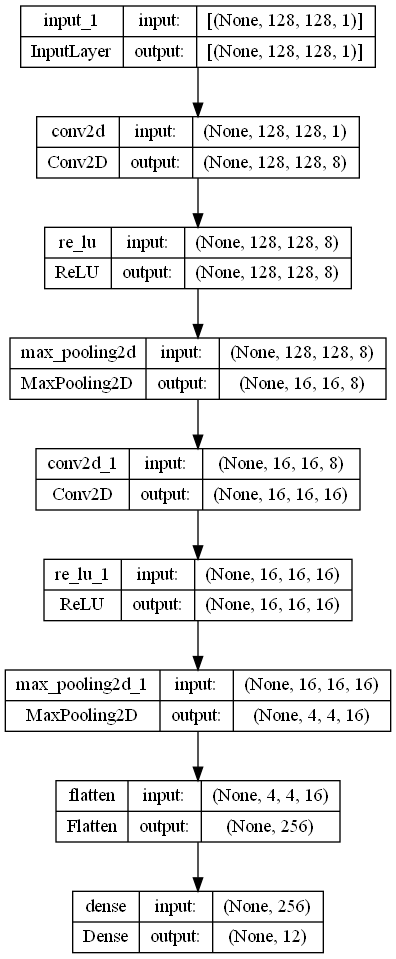

In [16]:
conv_model = convolutional_model((128, 128, 1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

tf.keras.utils.plot_model(conv_model, show_shapes=True)

[ANG]

**compile()** function, which allows you to configure the model before training it. The following parameters are used:

`optimizer` - specifies the optimiser that will be used to train the model. The optimiser chosen was Adam, it is an adaptive gradient method that incorporates components of both simple gradient and moment. This makes Adam more robust to spikes in weights and increases the learning rate.

`loss` - specifies the loss function that will be used to assess the quality of the model during training. In the example, this is categorical_crossentropy - or categorical cross entropy, specifies the difference between the true probability distribution (in the form of a one-hot vector) and the predicted probability distribution. The lower the cross entropy value, the better the model.

`metrics` specifies a list of metrics that will be used to assess the quality of the model during training and validation. In the example, this is accuracy - or precision.

----

[POL]

**compile()** funkcja, która pozwala na skonfigurowanie modelu przed jego trenowaniem. Użyto następujących parametrów:

`optimizer` -  określa optymalizator, który będzie używany do trenowania modelu. Wybrano optymalizator `Adam`, jest to adaptacyjna metoda gradientu, która zawiera składniki zarówno gradientu prostego jak i momentu. Dzięki temu Adam jest bardziej odporny na skokowe wartości wag i zwiększa szybkość uczenia.

`loss` - określa funkcję straty (ang. loss function), która będzie używana do oceny jakości modelu podczas trenowania. W przykładzie jest to `categorical_crossentropy` - czyli kategorialna entropia krzyżowa, określa różnicę między prawdziwym rozkładem prawdopodobieństwa (w postaci wektora one-hot) a przewidywanym rozkładem prawdopodobieństwa. Im niższa wartość entropii krzyżowej tym lepszy jest model.

`metrics` określa listę metryk, które będą używane do oceny jakości modelu podczas trenowania i walidacji. W przykładzie jest to accuracy - czyli dokładność.

[ANG]**Reconfiguring image formats**

[POL]**Przekształcanie formatu zdjęć**

In [17]:
def reshape_images(images):
  return images.reshape(images.shape[0], 128, 128, 1)

train_images = reshape_images(train_images)
test_images = reshape_images(test_images)

# checking image shapes
print(train_images.shape)
print(test_images.shape)

(18000, 128, 128, 1)
(3600, 128, 128, 1)


[ANG]

We reshape the image vector to match the model input.

Instead of the RGB colour space, we use greyscale images, which allows us to perform the necessary calculations faster and save operational resources.

---

[POL]

Zmieniamy kształt wektora zdjęć tak, aby odpowiadał wejściu modelu.

Zamiast przestrzeni barw RGB wykorzystujemy zdjęcia w skali szarości, co umożliwia szybsze wykonanie niezbędnych obliczeń i zaoszczędzenie zasobów operacyjnych. 

[ANG]**Learning and testing the model**.

---

[POL]**Uczenie i testowanie modelu**

[ANG]

Worth noting are:

`batch_size` determines the number of examples that are used during one learning step. It involves training the model on small batches of data (batch) instead of all of them. This process is about efficient use of working memory and shortening computational time.

The `epochs` determine the number of runs through the entire training data set. During one epoch, the model learns on all examples from the training data, updating its parameters.

In addition, the `fit()` function is used to train the model on the training data. The function starts by initialising the model parameters and then iterates through the training data, dividing it into parcels (*ang. batch*) and performs the learning process so that the model parameters are updated. The process is repeated for a set number of epochs. It also allows the use of validation data, which is used to evaluate the performance of the model during training. 

---

[POL]

Warte uwagi są:

`batch_size` określa liczbę przykładów, które są używane w trakcie jednego kroku uczenia. Polega na trenowaniu modelu na małych partiach danych (batch) zamiast na wszystkich. Proces ten polega na efektywnym używaniu pamięci operacyjnej i skraceniu czasu obliczeniowego.

`epochs` określają liczbę przebiegów przez cały zbiór danych treningowych. W trakcie jednej epoki model uczy się na wszystkich przykładach z danych treningowych, aktualizując swoje parametry.

Ponadto funkcja `fit()`jest używana do trenowania modelu na danych treningowych. Funkcja rozpoczyna się od inicjalizacji parametrów modelu, a następnie iteracyjnie przechodzi przez dane treningowe, dzieląc je na paczki (*ang. batch*) i wykonuje proces uczenia, tak by zaktualizować parametry modelu. Proces jest powtarzany przez określoną liczbę epok. Pozwala także na wykorzystanie danych walidacyjnych, które są używane do oceny wydajności modelu podczas treningu. 


In [18]:
batch_size = 128
epochs = 5

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

history = conv_model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
141/141 [==============================] - 76s 527ms/step - loss: 6.1024 - accuracy: 0.4927 - val_loss: 0.6561 - val_accuracy: 0.8011
Epoch 2/5
141/141 [==============================] - 74s 526ms/step - loss: 0.3761 - accuracy: 0.8841 - val_loss: 0.2016 - val_accuracy: 0.9392
Epoch 3/5
141/141 [==============================] - 65s 459ms/step - loss: 0.1484 - accuracy: 0.9529 - val_loss: 0.1191 - val_accuracy: 0.9633
Epoch 4/5
141/141 [==============================] - 64s 455ms/step - loss: 0.0870 - accuracy: 0.9726 - val_loss: 0.0819 - val_accuracy: 0.9772
Epoch 5/5
141/141 [==============================] - 65s 463ms/step - loss: 0.0550 - accuracy: 0.9832 - val_loss: 0.0610 - val_accuracy: 0.9819


## 6. Results
## 6. Wyniki

### 6.1 Accuracy and loss chart 
### 6.1. Wykres dokładności i strat 

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_7664\3117959760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\Wojciech\AppData\Local\Temp\ipykernel_7664\3117959760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

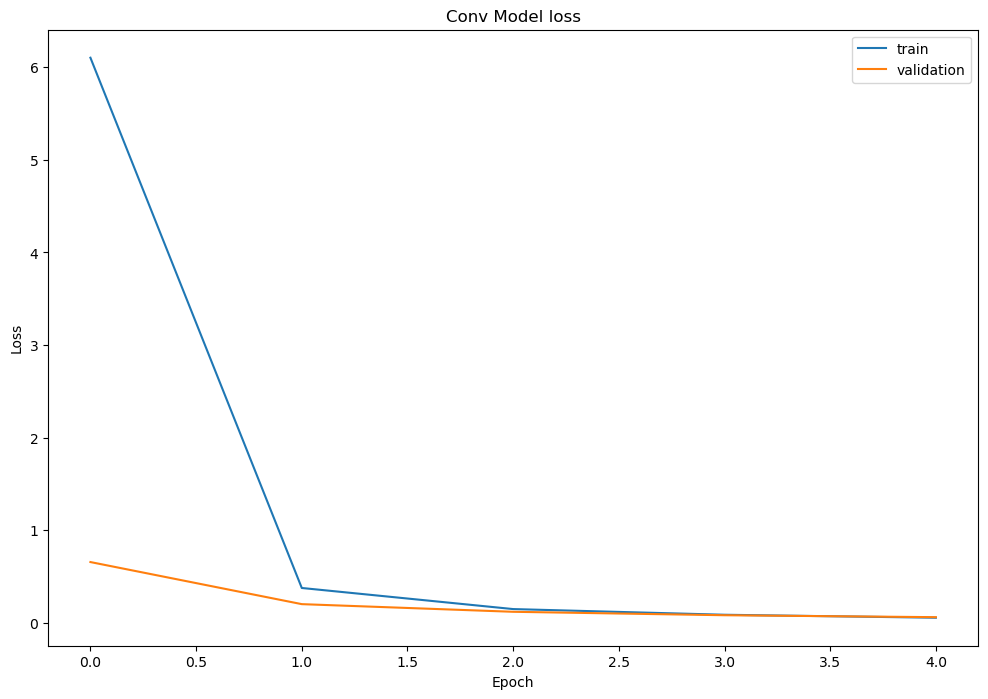

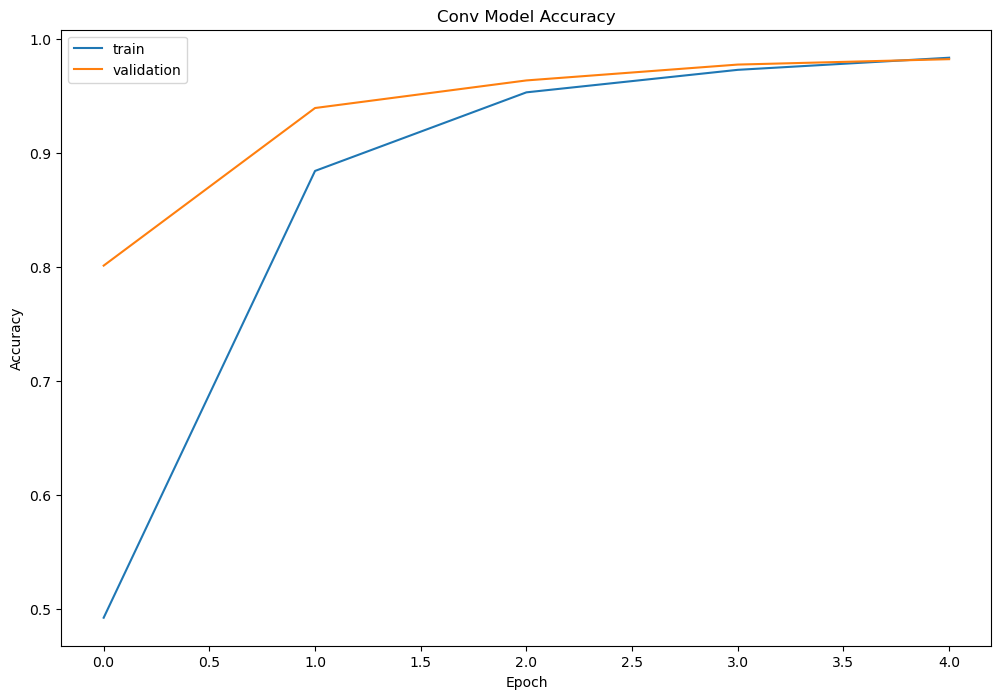

In [19]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)

df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Conv Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Conv Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

[ANG]

The **Loss graph (*ang. Loss graph*)** graphically represents the degree of imperfection of the model. It is a numerical value that indicates how much the model is wrong. The lower its value, the better the model performs with the data. It can be calculated in a number of ways, e.g. by measuring the root mean square error between the predicted value and the actual value.

**Accuracy graph (*ang. Accuracy graph*)** graphically represents the percentage of correct model predictions based on test data. It is one of the most commonly used metrics for assessing model quality in classification problems. Determined as the number of correct predictions divided by the total number of predictions. The higher the value, the better.

----

[POL]

**Wykres Strat (*ang. Loss graph*)** przedstawia graficznie stopień niedoskonałości modelu. Jest to wartość numeryczna, która określa, jak bardzo model się myli. Im niższa jej wartość, tym lepiej model radzi sobie z danymi. Może być liczona na wiele sposobów np. na podstawie mierzenia błędu średnio kwadratowego między przewidywaną wartością a rzeczywistą wartością.

**Wykres dokładności (*ang. Accuracy graph*)** przedstawia graficznie procent poprawnych przewidywań modelu na podstawie danych testowych. Jest to jeden z najczęściej używanych metryk do oceny jakości modelu w problemach klasyfikacji. Wyznaczana jako iloraz liczby poprawnych przewidywań i całkowitej ich liczby. Im wyższa wartość tym lepiej.

Wykresy te mogą posłużyć do analizy nad wyborem, który model jest lepszy.

[ANG]

### 6.2 Confusion matrix 
The `confusion_matrix`.

This is a table that shows the number of correct and incorrect classification cases for a model. Used to assess the quality of model performance.

`y_true` - denotes **true** labels for the test data, i.e. what **should** be returned by the model,

`y_pred` - stands for **predicted** or predicted labels for the test data, i.e. what the model **actually** returned


---
[POL]

### 6.2. Macierz Pomyłek 
`confusion_matrix`

Jest to tabela, która przedstawia ilość przypadków poprawnych i niepoprawnych klasyfikacji dla modelu. Używana w celu oceny jakości działania modelu.

`y_true` - oznacza **prawdziwe** etykiety dla danych testowych, czyli to, co **powinien** zwrócić model,

`y_pred` - oznacza **prognozy** lub przewidywane etykiety dla danych testowych, czyli to, co **rzeczywiście** zwrócił model

3600/3600 [==============================] - 14s 4ms/step


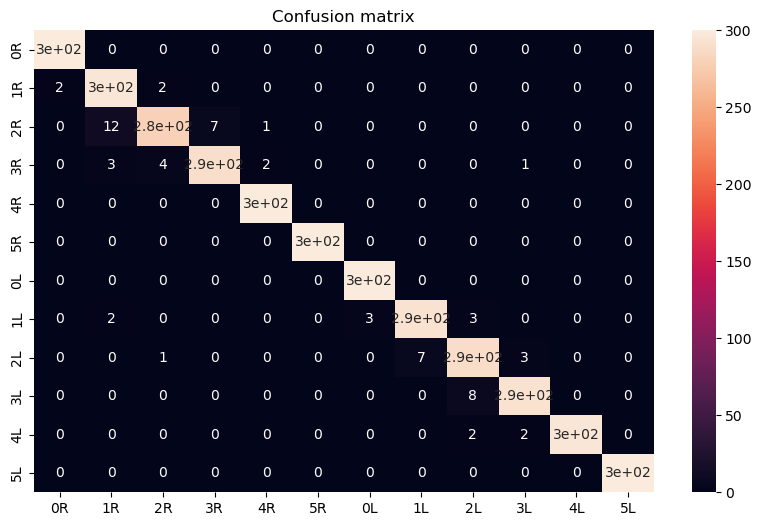

In [20]:
predictions = conv_model.predict(x=test_images, steps=len(test_images), verbose=1)
cm = confusion_matrix(y_true=test_labels.argmax(axis=1), y_pred=predictions.argmax(axis=1))
# print(cm)

plt.figure(figsize = (10,6))
labels = list(label_to_int.keys())
sns.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels)
plt.title('Confusion matrix')
plt.show()

[ANG]

The **conclusions of the confusion matrix**.

The above matrix, known as the confusion matrix, graphically represents the errors the model makes. It allows us to observe how wrong our model is and **most importantly, in which cases**. It is noteworthy that, regardless of the sample, the model makes the largest errors in counting the **nearest number of fingers**. It is noteworthy that mistaking the left hand for the right hand and vice versa is extremely rare.

---

[POL]

**Wnioski z macierzy pomyłek**

Powyższa macierz zwana jako macierz pomyłek w graficzny sposób przedstawia błędy, jakie popełnia model. Dzięki niej możemy zaobserwować, jak bardzo myli się nasz model oraz **co najważniejsze - w jakich przypadkach**. Warto zauważyć, że niezależnie od próby model popełnia największe błędy w liczeniu **sąsiedniej liczby palców**. Na uwagę zasługuję fakt, że mylenie lewej ręki z prawą i na odwrót odbywa się nadzwyczaj rzadko.


[ANG]

### 6.3 Displaying a sample test sample

It graphically depicts the results of the model.

---

[POL]

### 6.3. Wyświetlenie przykładowej próbki testowej

Przedstawia ona w graficzny sposób wyniki działania modelu.

In [21]:
# example result
example_result = conv_model.predict((test_images[0:1]))
print("Example prediction result:", example_result)
print("Largest value in the vector:", np.max(example_result))
print("Index of largest value - class:", np.argmax(example_result))

1/1 [==============================] - 0s 154ms/step
Example prediction result: [[3.9207196e-16 1.3963017e-13 4.0052774e-12 3.5100489e-16 8.4770667e-13
  2.1431521e-11 6.2699549e-16 8.9511849e-11 1.7835865e-12 7.8055042e-14
  1.9091919e-09 1.0000000e+00]]
Largest value in the vector: 1.0
Index of largest value - class: 11


[ANG]
The result of the model query is a vector of the length of the number of classes, specifying the probability of belonging to the following classes. The final class membership is determined by finding the column with the highest probability.

---

[POL]
Wynikiem zapytania modelu jest wektor o długości liczby klas, określający prawdopodobieństwo należenia do kolejnych klas. Ostateczną przynależność do klasy określamy poprzez znalezienie kolumny, w której prawdopodobieństwo jest największe.

In [22]:
#reversing the dictionary so that the values become keys and the keys become values

new_dict = dict(zip(label_to_int.values(),label_to_int.keys()))  
#resulting in the numbers 0 - 11 becoming the keys and the values '0R' , '1R', '2R', '3R', '4R', '5R', '0L', '1L', '2L', '3L', '4L', '5L' respectively


#function that converts given keys into values using 'reverse' dictionary
def transform_int_to_label(int):
  return new_dict[int]

4/4 [==============================] - 0s 13ms/step


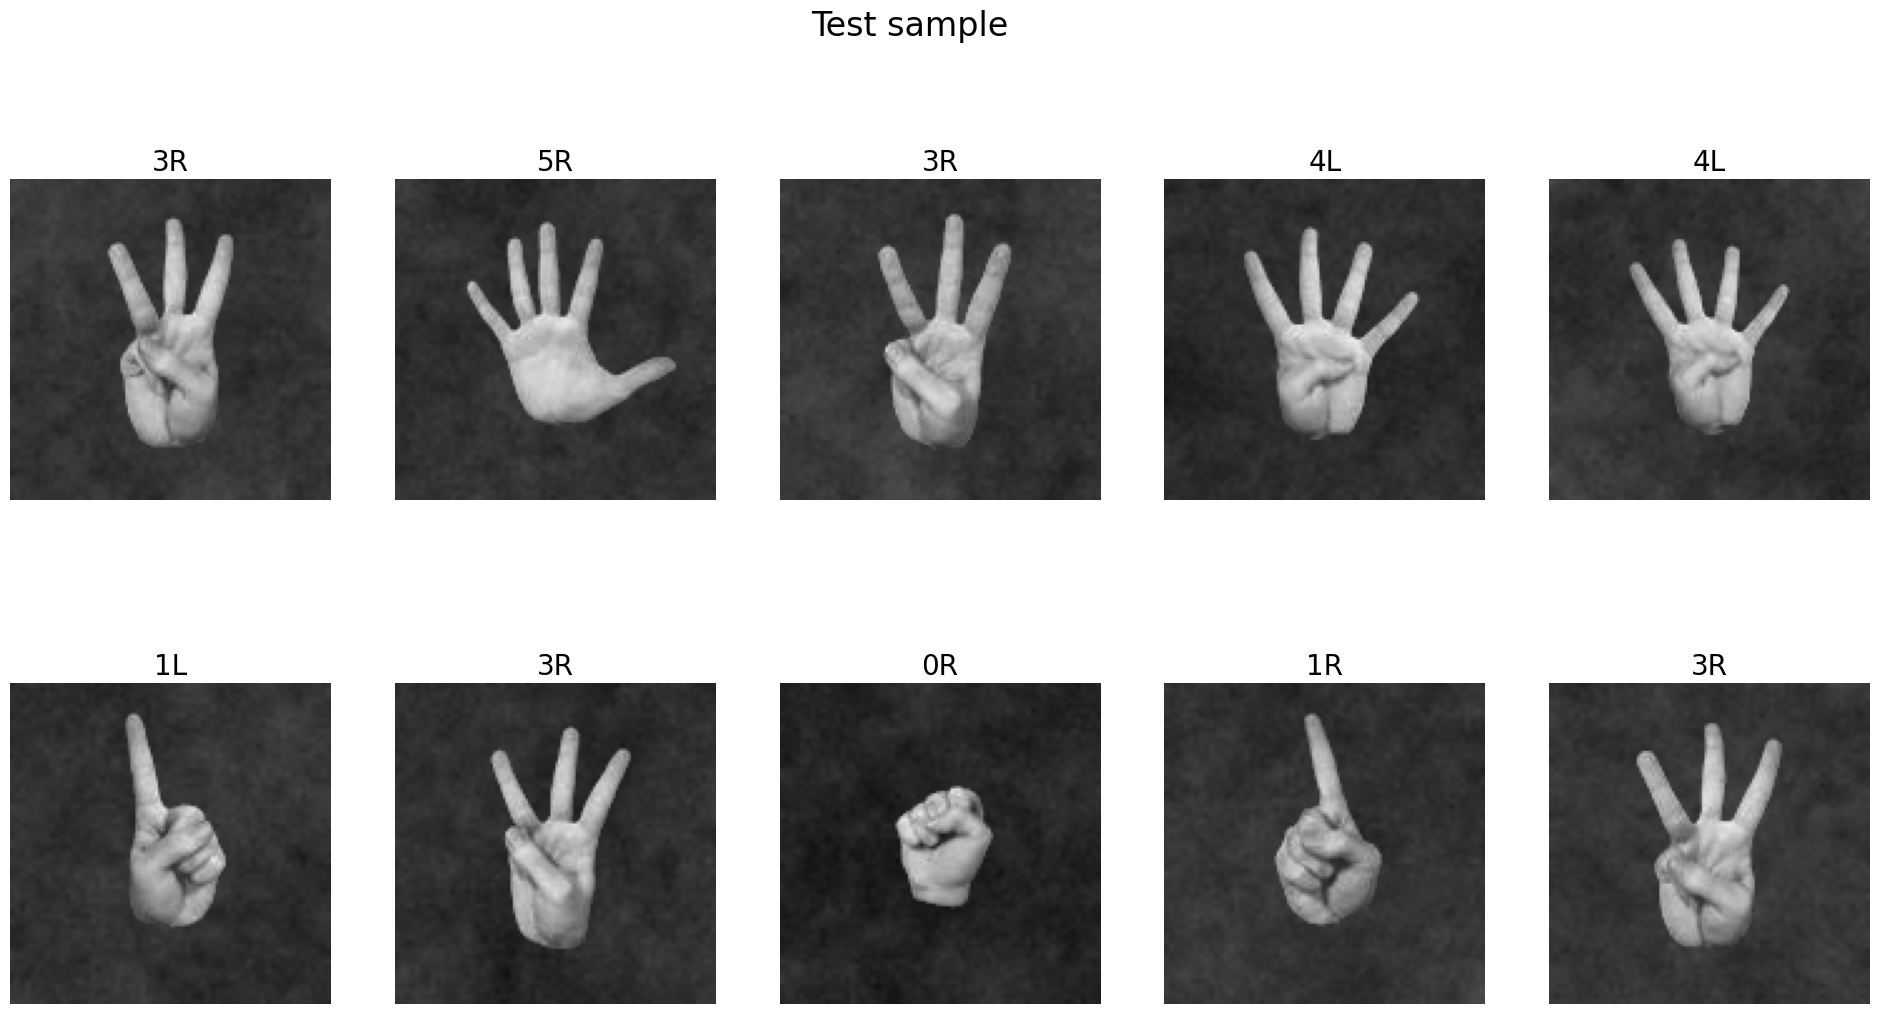

In [23]:
#sample creation
sample_predictions = conv_model.predict(test_images[:100])
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=20
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(test_paths[count])
        result = np.argmax(sample_predictions[count])

        label = transform_int_to_label(result)
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(label, fontsize = 20)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Test sample", fontsize = 24)        
plt.show()

[ANG]

The figures above show a sample of the results from the neural network model. For the most part, they should correctly represent the number of fingers in the title, where the first character indicates the number of fingers and the second character indicates which hand (L - left, R - right).

---

[POL]

Powyższe rysunki przedstawiają próbkę wyników z działania modelu sieci neuronowych. W zdecydowanej większości powinny prawidłowo w tytule przedstawiać ilość palców, gdzie pierwszy znak oznacza liczbę palców, a drugi - jaka ręka (L — lewa, R — prawa).


[ANG]

### 6.4 Final results

The above neural network model works properly. In support of this, let there be:


1. a high efficiency of approximately 97%.
2. the loss function reaches low values - close to zero.
3. the confusion matrix has a high number of correctly identified data on the diagonal. The number of model confusions displayed outside the diagonal, which represent which cases the model does not cope with, is relatively low. 

---

[POL]

### 6.4. Wyniki końcowe

Powyższy model sieci neuronowych działa właściwie. Na poparcie tych słów niech będzie:


1.   Wysoka sprawność wynosząca ok. 97%.
2.   Funkcja strat osiąga niskie wartości - bliskie zeru.
3.   Macierz pomyłek posiada na diagonali wysoką liczbę poprawnie zidentyfikowanych danych. Liczba pomyłek modelu wyświetlanych poza diagonalią, które przedstawiają z jakimi przypadkami dany model sobie nie radzi, jest stosunkowo mała. 
